In [196]:
import json
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [289]:
tp='cle_radius.csv'
all_data=pd.read_csv(tp)
df=all_data.drop(['identifier/fips', 'identifier/apn', 'identifier/apnOrig', 'vintage/lastModified', 'vintage/pubDate', 'summary/propIndicator', 'summary/proptype','location/geoid', 'identifier/attomId', 'sale/amount/salecode', 'sale/amount/saledisclosuretype', 'address/line1', 'address/line2', 'address/matchCode', 'address/countrySubd', 'address/postal2', 'address/postal3', 'location/accuracy', 'address/country', 'sale/amount/saledocnum', 'summary/propLandUse', 'sale/salesearchdate', 'sale/saleTransDate', 'location/elevation' ], axis=1)
df.dtypes
df2=df.merge(income2, how='inner', on= 'address/postal1')

In [365]:
house=pd.read_csv('house.csv', dtype={'name': int, 'med/housing':int })
house1=house.drop(['geoid', 'B25077001, Error'], axis=1)
house2=house1.rename(columns={'name': 'address/postal1'})
houses=house2.iloc[1:]
houses2=houses.loc[houses["med/housing"] > 1, :]


In [366]:
dem=pd.read_csv('demo.csv', dtype={'1':float, 'total':int, 'address/postal1':int, '2':int, '3':int, '4':int})
dem2=dem.iloc[1:]
dem3=dem2.loc[:, ["address/postal1", "total", "1", "2", "3", "4"]]
dem3['1per']=(dem3['1']/dem3['total'])*100
dem3['2per']=(dem3['2']/dem3['total'])*100
dem3['4per']=(dem3['4']/dem3['total'])*100


In [367]:
pop=pd.read_csv('pop.csv', dtype={'population':float, 'address/postal1':int})
pop2=pop.iloc[1:]
pop3=pop2.loc[:, ["address/postal1", "population" ]]


In [598]:
edu=pd.read_csv('education.csv', dtype={'total':float, 'address/postal1':int, 'Bachelors':int, 'Masters':int, 'HighSchool':int, 'Associates':int, 'Professional':int, 'Doctorate':int})
edu2=edu.iloc[1:]
edu3=edu2.loc[:, ["address/postal1", "total", "Bachelors", "Masters", "HighSchool", "Associates", "Professional", "Doctorate"]]
edu3['bachper']=(edu3['Bachelors']/edu3['total'])*100
edu3['docper']=(edu3['Doctorate']/edu3['total'])*100
edu3['mastper']=(edu3['Masters']/edu3['total'])*100
edu3['HSper']=(edu3['HighSchool']/edu3['total'])*100

In [369]:


age=pd.read_csv('age.csv', dtype={'total':float, 'address/postal1':int})
age2=age.iloc[1:]
age3=age2.drop(['geoid', 'B01002000.5', 'B01002000.5, Error', 'B01002001, Error', 'male', 'female', 'B01002002, Error', 'B01002003, Error'], axis=1)


In [599]:
merge1=dem3.merge(pop3, how='inner', on='address/postal1' )
merge2=merge1.merge(edu3, how='outer', on='address/postal1')
merge3=merge2.merge(age3, how='inner', on='address/postal1')
merge3

,address/postal1,total_x,1,2,3,4,1per,2per,4per,population,...,Masters,HighSchool,Associates,Professional,Doctorate,bachper,docper,mastper,HSper,total
0,16159,4824,4703.0,11,0,13,97.491708,0.228027,0.269486,4824.0,...,237,1571,316,0,0,13.741110,0.000000,6.742532,44.694168,47.3
1,43001,2890,2782.0,0,0,0,96.262976,0.000000,0.000000,2890.0,...,162,659,134,28,8,21.461657,0.411734,8.337622,33.916624,39.3
2,43002,3238,3020.0,98,0,97,93.267449,3.026560,2.995676,3238.0,...,298,221,431,109,11,41.672426,0.380097,10.297167,7.636489,32.7
3,43003,2895,2836.0,0,0,2,97.962003,0.000000,0.069085,2895.0,...,72,835,165,8,9,13.473787,0.440960,3.527683,40.911318,41.3
4,43004,25768,17174.0,6538,0,1092,66.648556,25.372555,4.237814,25768.0,...,1765,2887,1355,409,171,30.537597,0.995981,10.280156,16.815190,34.9
5,43005,200,200.0,0,0,0,100.000000,0.000000,0.000000,200.0,...,0,148,0,0,0,2.890173,0.000000,0.000000,85.549133,59.3
6,43006,609,609.0,0,0,0,100.000000,0.000000,0.000000,609.0,...,0,205,50,0,0,2.832244,0.000000,0.000000,44.662309,50.5
7,43008,2619,2425.0,0,41,81,92.592593,0.000000,3.092784,2619.0,...,66,664,112,0,0,9.508716,0.000000,3.486529,35.076598,37.7
8,43009,2219,2214.0,5,0,0,99.774673,0.225327,0.000000,2219.0,...,128,503,164,5,0,16.777188,0.000000,8.488064,33.355438,40.4
9,43010,288,288.0,0,0,0,100.000000,0.000000,0.000000,288.0,...,1,90,24,0,0,3.645833,0.000000,0.520833,46.875000,38.2


In [ ]:
food_stamp=pd.read_csv('fs.csv', dtype={'PA/FS': int, 'NO_PA/FS':int, 'address/postal1':int})
fs=food_stamp.drop(['geoid', 'B19058001, Error', 'B19058002, Error', 'B19058003, Error'], axis=1)
fs['perc_fs']=(fs['PA/FS']/fs['B19058001'])*100
fs1=fs.drop(['B19058001'], axis=1)
fs2=fs1.iloc[1:]


In [199]:
med_inc2=pd.read_csv('medianincome.csv', dtype={'zipcode': int, 'median':int})
med_inc=med_inc2.rename(columns={'zipcode': 'address/postal1', 'median': 'median_income'})
income=med_inc.drop(['geoid', 'B19013001, Error'], axis=1)
income2 = income.iloc[1:]


In [300]:
df_res= df.loc[df["summary/propclass"] == "Single Family Residence / Townhouse", :]
b=df_res['address/postal1'].unique()
dataframe2=pd.DataFrame(b, columns=['zip'])


In [201]:
e=df_res['address/locality'].unique()
dataframle=pd.DataFrame(e, columns=['a'])
dataframe.to_csv("crime2.csv")

In [202]:
df_r=pd.read_csv('desc_df2.csv')


In [203]:
df_r['identifier/obPropId'].astype(str)
ids=df_r['identifier/obPropId'].tolist()


In [625]:
desc_df = df_res.sort_values("sale/amount/salerecdate", ascending=False)
desc_df2=desc_df.iloc[0:1000, :]
#desc_df2.to_csv('desc_df.csv')

In [626]:
desc_df3=desc_df2.loc[desc_df2["summary/yearbuilt"] > 1, :]

In [627]:
desc_df4=desc_df3.loc[desc_df3["sale/amount/saleamt"] > 5000, :]

In [644]:
desc_df5=desc_df4.loc[desc_df4['building/rooms/bathstotal'] > 0, :]

In [645]:
desc_df6=desc_df5.merge(income2, how='inner', on= 'address/postal1')

In [646]:
desc_df7=desc_df6.loc[desc_df6["median_income"] > 1, :]

In [647]:
desc_df8=desc_df7.loc[desc_df7["sale/amount/saleamt"] < 1000000, :]

In [648]:
desc_df9=desc_df8.merge(fs2, how='inner', on='address/postal1')


In [649]:
desc_df10=desc_df9.merge(houses2, how='inner', on='address/postal1')

In [650]:
desc_df11=desc_df10.merge(merge3, how='inner', on='address/postal1')

In [675]:
desc_df12=desc_df11.loc[desc_df11["population"] > 1, :]

In [676]:
ML_df=desc_df12.loc[:, ["LotSizeAcres", "med/housing", "median_income", "2per", "Masters", "HSper", "bachper", "total", "population", "perc_fs", "location/distance", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds", "sale/amount/saleamt"]]
ML_df.to_csv('ML.csv')
ML_df['difference_house']=ML_df['sale/amount/saleamt']-ML_df['med/housing']
ML_df

,LotSizeAcres,med/housing,median_income,2per,Masters,HSper,bachper,total,population,perc_fs,location/distance,summary/yearbuilt,building/rooms/bathstotal,building/rooms/beds,sale/amount/saleamt,difference_house
0,0.2251,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,16.44,2013,3.0,3,205000,3800
1,0.7800,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,22.41,1860,1.0,2,119000,-82200
2,0.1417,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,20.62,1955,1.0,3,112000,-89200
3,4.0200,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,20.24,1971,2.0,4,235000,33800
4,10.3800,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,18.76,1958,6.0,4,434000,232800
5,0.3100,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,18.75,1994,3.0,3,222500,21300
6,0.2397,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,21.59,1956,1.0,3,125900,-75300
7,0.1600,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,20.57,1996,1.0,3,162500,-38700
8,0.3753,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,21.18,1984,2.0,3,174000,-27200
9,1.0000,201200,76741,2.309436,4064,24.348681,26.251726,41.8,62656.0,6.650361,25.67,1969,2.0,3,159900,-41300


In [693]:
X = ML_df[["LotSizeAcres", "location/distance", "med/housing", "perc_fs", "median_income", "HSper", "bachper", "2per", "Masters", "total", "population", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds"]]
y = ML_df["sale/amount/saleamt"].values.reshape(-1, 1)
print(X.shape, y.shape)

(958, 14) (958, 1)


In [694]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [695]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [696]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [697]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [698]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.612358743291386
Testing Score: 0.6334109101079421


In [699]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)


print(f"Training Score: {training_score}")

print(f"MSE: {MSE}, testing: {r2}")

Training Score: 0.612358743291386
MSE: 0.33495338087033966, testing: 0.6347934225510052


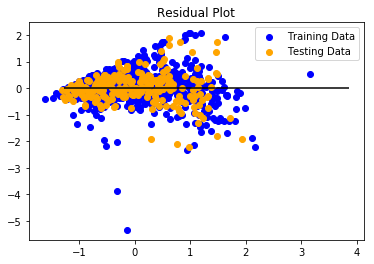

In [700]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [701]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33622136793709506, R2: 0.6334109101079421


In [686]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled ,y_train_scaled)
model.best_params_


{'n_neighbors': 7}

In [687]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')

In [688]:
training_score = neigh.score(X_train_scaled, y_train_scaled)
testing_score = neigh.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6753502137299969
Testing Score: 0.6256772601109549


In [689]:
MSE2 = mean_squared_error(y_test_scaled, neigh.predict(X_test_scaled))
print(MSE2)

0.34331437330149195


In [690]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 916, min_samples_split= 5, min_samples_leaf= 2, max_depth=20, random_state=6) 
  
# fit the regressor with x and y data 
regressor.fit(X_train_scaled, y_train_scaled.ravel())   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=916, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [691]:
training_score = regressor.score(X_train_scaled, y_train_scaled)
testing_score = regressor.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.88308160445173
Testing Score: 0.6773910008925916


In [692]:
data = ML_df.drop("sale/amount/saleamt", axis=1)
feature_names = data.columns
sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

[(0.4132672859235252, 'summary/yearbuilt'),
 (0.15997096317715298, 'location/distance'),
 (0.12049797205281301, 'LotSizeAcres'),
 (0.08861346937327531, 'Masters'),
 (0.046124539825911755, 'med/housing'),
 (0.04155067703327384, 'median_income'),
 (0.028187864027138285, 'HSper'),
 (0.02582703351115051, 'bachper'),
 (0.018726352177882183, '2per'),
 (0.015203259361946062, 'population'),
 (0.015014598314762807, 'total'),
 (0.01366071761103678, 'building/rooms/bathstotal'),
 (0.01335526761013173, 'perc_fs')]

In [443]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [444]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


KeyboardInterrupt: 

In [404]:
rf_random.best_params_

{'n_estimators': 916,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [405]:
#explore api options
import http.client 

conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

headers = { 
    'accept': "application/json", 
    'apikey': "487ac4986deb86031b6d88f9505dfdc6", 
} 

ids="18471319108031"
conn.request("GET", "/propertyapi/v1.0.0/property/detail?id="+ ids, headers=headers) 

res = conn.getresponse() 
data = res.read() 

data1=data.decode("utf-8")
print(data1)

{"status":{"version":"1.0.0","code":0,"msg":"SuccessWithResult","total":1,"page":1,"pagesize":10},"property":[{"identifier":{"obPropId":18471319108031,"fips":"08031","apn":"0219204018000","apnOrig":"219204018000","attomId":184713191},"lot":{"depth":0,"frontage":0,"lotnum":"31","lotsize1":0.1077,"lotsize2":4690,"pooltype":"NONE"},"area":{"blockNum":"36","countrysecsubd":"Denver County","countyuse1":"113","muncode":"DE","munname":"DENVER","srvyRange":"68W","srvySection":"19","srvyTownship":"03S","subdname":"BERKELEY","subdtractnum":"0","taxcodearea":"0"},"address":{"country":"US","countrySubd":"CO","line1":"4529 WINONA CT","line2":"DENVER, CO 80212","locality":"Denver","matchCode":"ExaStr","oneLine":"4529 WINONA CT, DENVER, CO 80212","postal1":"80212","postal2":"2512","postal3":"C037"},"location":{"accuracy":"Street","elevation":0.0,"latitude":"39.778904","longitude":"-105.047624","distance":0.0,"geoid":"CO08031, CS0891007, DB0803360, MT30001324, ND0000119198, ND0000539537, PL0820000, SB

In [407]:
import numpy
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'tensorflow'

In [408]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define base model
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
# Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=2)

ModuleNotFoundError: No module named 'tensorflow'

In [409]:

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train_scaled, y_train_scaled, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'KFold' is not defined